# Advertising campaign for the play store

## Data

In [25]:
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

In [26]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('/Users/anshilina/Documents/games.csv')
    
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [28]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


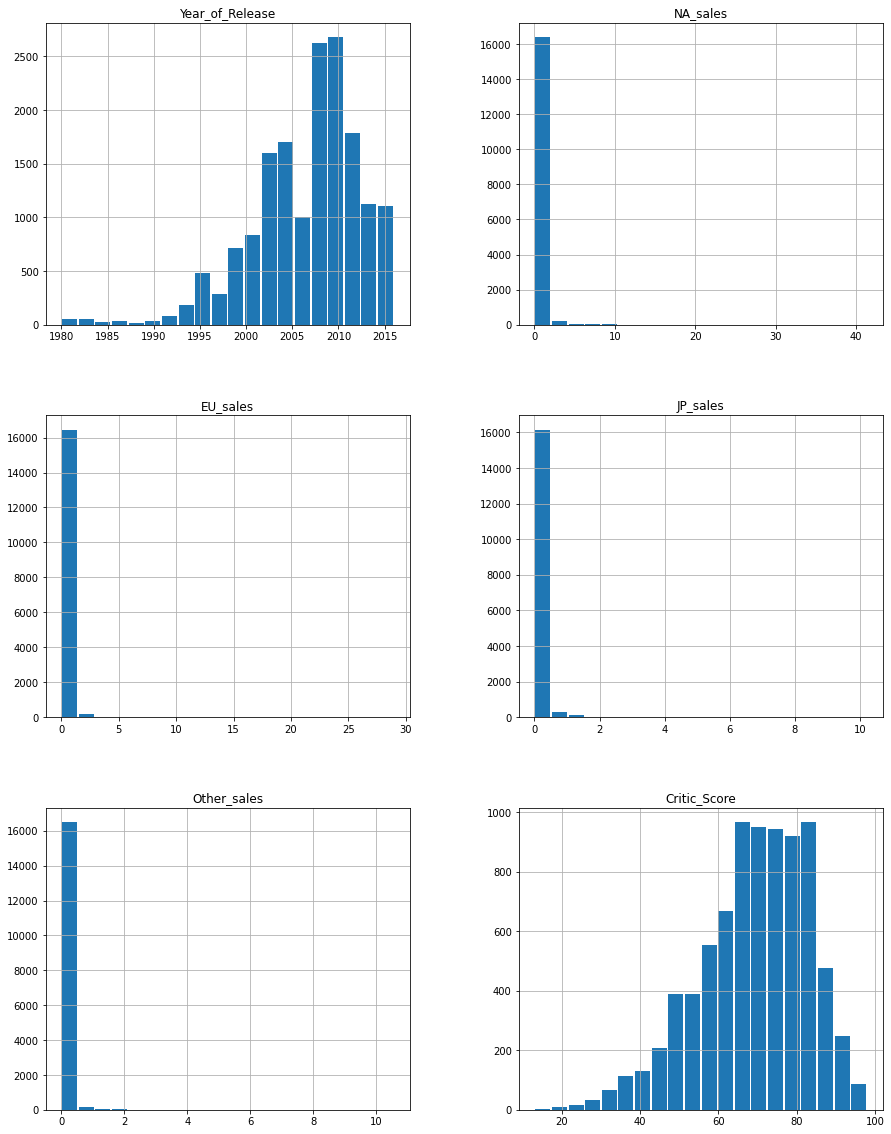

In [29]:
df.hist(figsize=(15,20), bins=20, rwidth=0.9)
plt.show()

**Summarz**: Having considered the array of data, we can distinguish the stages of working with data:

* Convert column names to lowercase
* Change the data type in the column "year of issue", "user rating"
* Examine duplicates
* Examine outliers
* Examine gaps in the columns "Game Name", "Critic Rating", "User Rating", "ESRB Rating", etc. Replace gaps if possible

## Data preprocessing

### Changing column names

To make data frame more convenient to use, we will reduce the names of the columns to lower case.

In [30]:
df.columns = df.columns.str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Changing data types

#### `year_of_release` variable

In the `year_of_release` column, we need to change the data type from float to integer format since float format is not informative. 

We cannot change the format without filling in the missing values. After examining the missing data, we concluded that there is no relationships between the missing values and game name, platform or genre (you can verify this by uncommenting the cell). We can't reconstruct the gaps from the data. Since the proportion of missing values is only 1.6%, let's drop it.

In [31]:
# df.loc[df['year_of_release'].isna() == True, 'name'].value_counts()
# df.loc[df['year_of_release'].isna() == True, 'platform'].value_counts()
# df.loc[df['year_of_release'].isna() == True, 'genre'].value_counts()

In [32]:
print('Proportion of missing values ("year_of_release"):', round(df['year_of_release'].isna().sum()*100/df.shape[0], 2))

Proportion of missing values ("year_of_release"): 1.61


In [33]:
df = df.loc[~df['year_of_release'].isna()].copy()
print('Number of missing values ("year_of_release"):', df['year_of_release'].isna().sum())

Number of missing values ("year_of_release"): 0


In [34]:
df['year_of_release'] = df['year_of_release'].astype('int')
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### `user_score` variable

The data type of the `user_score` variable is string, but based on the contents of the columns, it should be real. Note that the values of some observations in this column are "tbd", which means to be defined. Let's replace "tbd" with `None` and then change the data format to real.

In [35]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
df['user_score'] = pd.to_numeric(df['user_score'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Summary**: Now the data type of all variables is correct. Let's move on to the study of duplicates.

### Dropping dublicates

There is no identical rows in data frame.

In [37]:
df.duplicated().sum()

0

Let's check duplicates in `platform` and `genre` columns.

In [38]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [39]:
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

**Summary:** There is no duplicated string values in data frame. Let's move on to filling in missing values.

### Filling in missng values 

Let's check in which columns there are missing values. 

In [40]:
pd.DataFrame(df.isna().sum()).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,0
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8463
user_score,8983


#### `name` and `genre` variables

Interestingly, in those observations for which name is absent, there are missing values in genre too. Therefore, we cannot fill in this values using avaliable data. Since there are few missing values we suggest to drop it.

In [41]:
df.loc[df['genre'].isna()].index == df.loc[df['name'].isna()].index

array([ True,  True])

In [42]:
df = df.loc[~df['name'].isna()].copy()
print('Number of missing values ("name"):', df['name'].isna().sum())
print('Number of missing values ("genre"):', df['genre'].isna().sum())

Number of missing values ("name"): 0
Number of missing values ("genre"): 0


#### `critic_score` variable

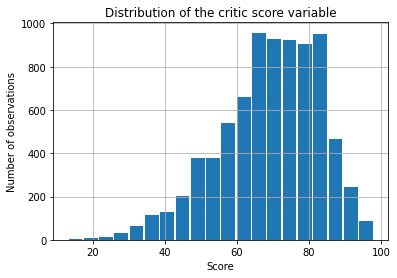

In [43]:
df['critic_score'].hist(bins=20, rwidth=0.9)
plt.title('Distribution of the critic score variable')
plt.xlabel('Score')
plt.ylabel('Number of observations')
plt.show()

In [44]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In the `critic_score` column, we observe more than 8.5 thousand missing values. 

We can see that in those observations for which critic score is absent, there are also missing values in user score and rating columns. Therefore we cannot use data from data frame to fill in these values. In addition, we cannot exclude these data from the data frame - they make up about 50% of the entire sample.

In [45]:
df['critic_score'].isna().sum()

8461

In [46]:
df.loc[df['critic_score'].isna(), 'user_score'].isna().sum()

7892

In [47]:
df.loc[df['critic_score'].isna(), 'rating'].isna().sum()

6595

In [48]:
df['critic_score'].fillna(-1, inplace = True)

**Summary:** Let's replace missing values with -1 which means nothing. In the process of analyzing and testing hypotheses, we will filter out this value.

Next, let's fill in missing values in the "user rating" variable.

#### `user_score` variable

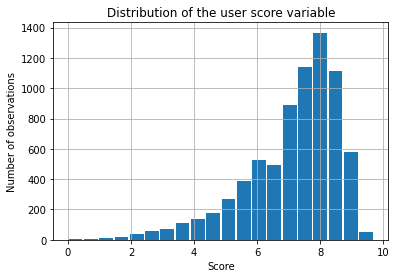

In [49]:
# визуализируем старое распределение
df['user_score'].hist(bins=20, rwidth=0.9)
plt.title('Distribution of the user score variable')
plt.xlabel('Score')
plt.ylabel('Number of observations')
plt.show()

In [50]:
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

**Summary:** The distribution of the variable is left-skewed and similar to normal. In most cases users are satisfied with games. There are no outliers in the data. Since the data missed not at random, and it cannot be restored based on the rest of the data frame (since the user's rating is the average rating of a particular game assigned to it and it does not depend on other variables), we will replace the missing values with -1.

In [51]:
df['user_score'].fillna(-1, inplace = True)

#### `rating ESRB` variable

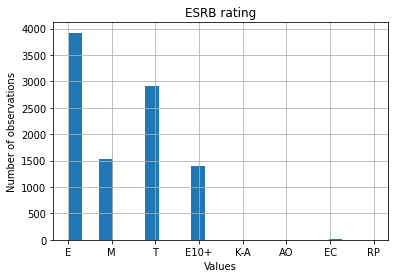

In [52]:
# визуализируем старое распределение
df['rating'].hist(bins=20, rwidth=0.9)
plt.title('ESRB rating')
plt.xlabel('Values')
plt.ylabel('Number of observations')
plt.show()

In [ ]:
df['rating'].describe()

The variable "ESRB rating" is categorical one. Most often, games receive an "E" rating - for everyone from 6 years old. Also, games are often assigned an age limit of "T" - "teenagers", the game is suitable for persons from 13 years old. The next most popular category is "M" - game content is not suitable for teenagers under 17 years old, then "E10 +" - for everyone from 10 years and older. The least common ratings is "AO" (adults only), "K-A" (children and adults) and "RP" (rating pending).

Missing values could be caused by error at the stage of uploading data. Also it could appear due to the lack of rating data in the game card on the site or due to the fact that the ESRB association did not rate the game.

**Summary:** Let's fill in the missing values with "unknown" values, since there is no data in the array that we can use to set age limits.

In [53]:
df['rating'] = df['rating'].fillna('unknown')

In [54]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [55]:
print(f'Number of observations in data frame: {df.shape[0]}.')

Number of observations in data frame: 16444.


**Summary:** Thus, the data types in the `year_of_release` and `user_score` columns were changed. The data was checked for the duplicates - they were not identified. The missing values in the variables `critic_score`, `user_score` have been replaced with -1. Missing values] in the `year_of_release`, `name` and `genre` variables have been removed. In the `rating` variable, missing values have been filled in with the value "unknown". As the result, there are more than 16.4 thousand observations in the data frame. Finally, let's calculate the total sales of each game in all regions.

In [56]:
df['region_sum'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'region_sum']].head())

,na_sales,eu_sales,jp_sales,other_sales,region_sum
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


## Data analysis

### Study of the releases by year

To study how many games were released in different years, we get a pivot table.

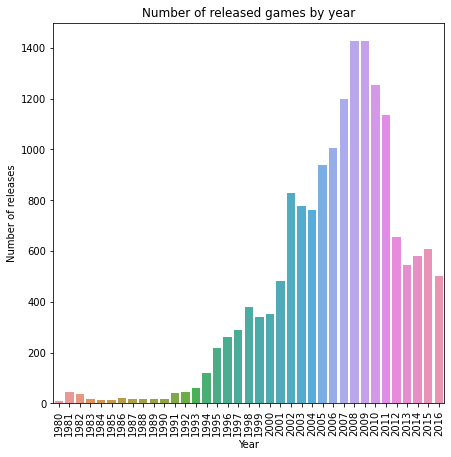

In [59]:
games_by_year = (df
                 .pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
)

plt.figure(figsize=(7,7))
sns.barplot(x=games_by_year.index, y=games_by_year['name'])
plt.title('Number of released games by year')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Number of releases')
plt.show()

**Summary:** It can be seen from the graph that until 1995, there were few game releases. After 1995, there has been a rapid increase in its number. Most of the games were released in 2002-2010. Therefore, we can focus on 2000-2016 in our analysis.

### Study of sales by platform

Let's see sales by platform and identify the platforms with the highest sales. These are DS, PS-PS3, Wii, X360.

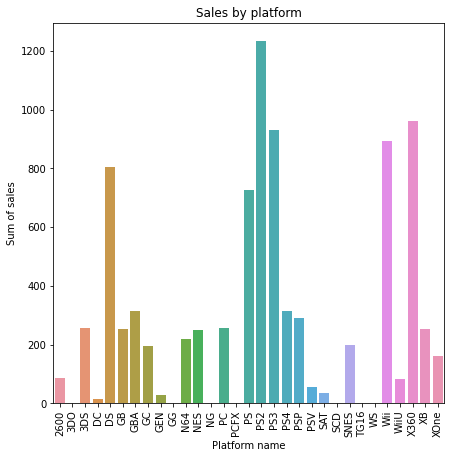

In [62]:
platform_sum = (df
                .pivot_table(index='platform', values='region_sum', aggfunc='sum')
)

plt.figure(figsize=(7,7))
sns.barplot(x=platform_sum.index, y=platform_sum['region_sum'])
plt.title('Sales by platform')
plt.xlabel('Platform name')
plt.xticks(rotation = 90)
plt.ylabel('Sum of sales')
plt.show()

To answer the question of how long it takes for new platforms to appear and old platforms to disappear, we can study distribution of sales on each platform. Let's create pivot table where we group data on all of top platforms.

In [63]:
top_platforms = (df
                 .query('(platform == "DS") | (platform == "PS") | (platform == "PS2") | (platform == "PS3") | (platform == "Wii") | (platform == "X360")')
                 .pivot_table(index=['platform', 'year_of_release'], values='region_sum', aggfunc='sum')
)
top_platforms.reset_index(inplace=True)
display(top_platforms.head())

,platform,year_of_release,region_sum
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


From graphs below, you can see that games on PS sold well from 1994 to 2003, on PS2 from 2000 to 2010, and on PS3 from 2006 to 2016, i.e., on average, within 9-10 years the platform is "updated". The DS, Wii and X360 platforms have also been popular for 9-10 years. They are needed to be upgraded to maintain sales.

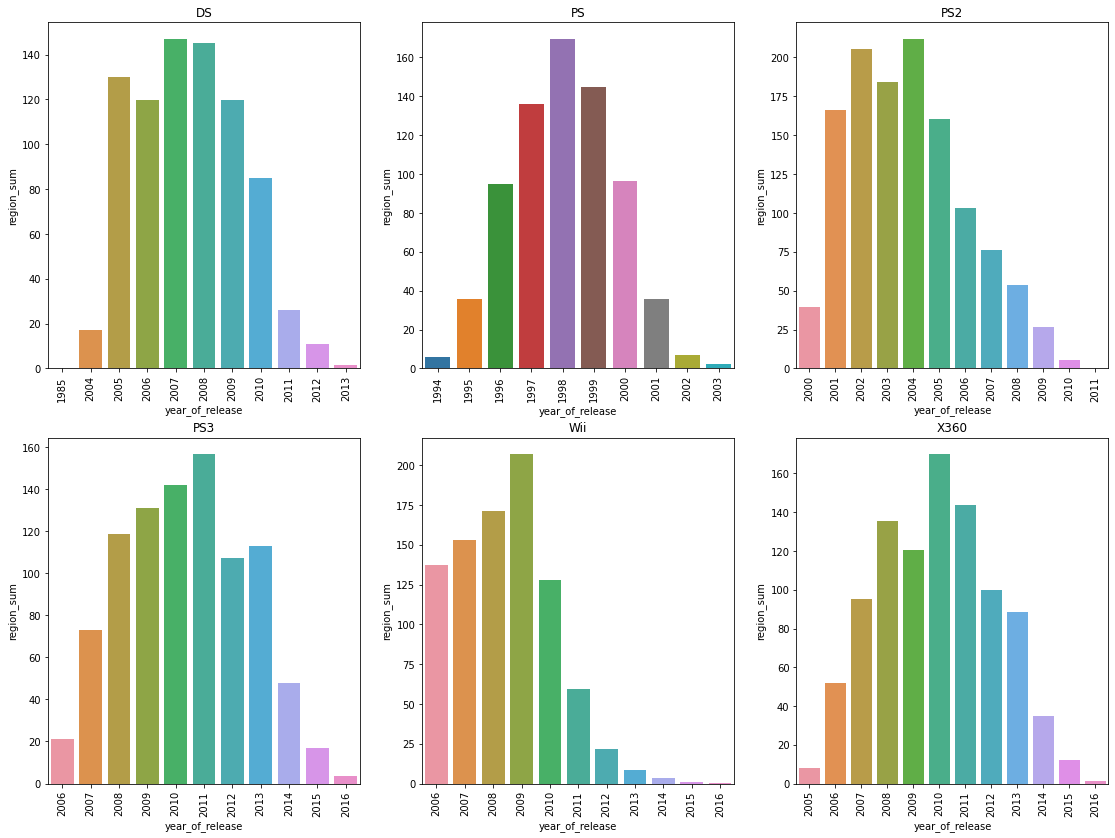

In [64]:
_, axs = plt.subplots(2, 3, figsize=(19,14))
axs = axs.ravel()
top = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

for i in range(len(top)):
    ax = axs[i]
    sns.barplot(ax=ax, x="year_of_release", y="region_sum", data=top_platforms.loc[top_platforms['platform'] == top[i]])
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(top[i])

On the graph for DS platform we can see outlier – 1985 year. This platform was not invented till 2004. Let's drop outlier.

In [65]:
df = df.loc[~((df['platform'] == 'DS') & (df['year_of_release'] == 1985))]
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum


**Summary:** At the first stage, we found out majority of the games were released in 2002-2010, therefore, we decided to exclude games released earlier than the 2000s from the sample. Next, we saw that gaming platforms have been popular for 9-10 years. Therefore, to develop a prediction for 2017, it is better to use data for the last 5-4 years, i.e. from 2013 to 2016.

In [69]:
df = df.query('year_of_release > 2012').copy()

The PS4 platform is the leader in sales for 2013-2016. Games released on PS3, XOne and 3DS platforms are also selling well.

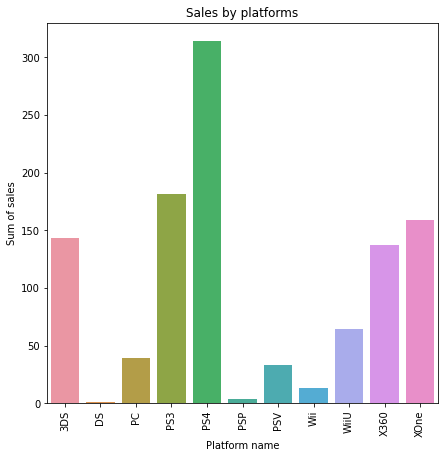

In [70]:
platform_sum = (df
                .pivot_table(index='platform', values='region_sum', aggfunc='sum')
)

plt.figure(figsize=(7,7))
sns.barplot(x=platform_sum.index, y=platform_sum['region_sum'])
plt.title('Sales by platforms')
plt.xlabel('Platform name')
plt.xticks(rotation = 90)
plt.ylabel('Sum of sales')
plt.show()

Let's study the sum of sales by years for each of the top platforms (PS4, PS3, XOne, 3DS).

In [71]:
top_platforms2 = (df
                 .query('(platform == "3DS") | (platform == "PS3") | (platform == "PS4") | (platform == "XOne")')
                 .pivot_table(index=['platform', 'year_of_release'], values='region_sum', aggfunc='sum')
)

top_platforms2.reset_index(inplace=True)
display(top_platforms2.head())

,platform,year_of_release,region_sum
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PS3,2013,113.25


Sales on PS3 are declining rapidly than on PS4, XOne, 3DS platforms. Let's consider PS4, XOne, 3DS as more profitable.

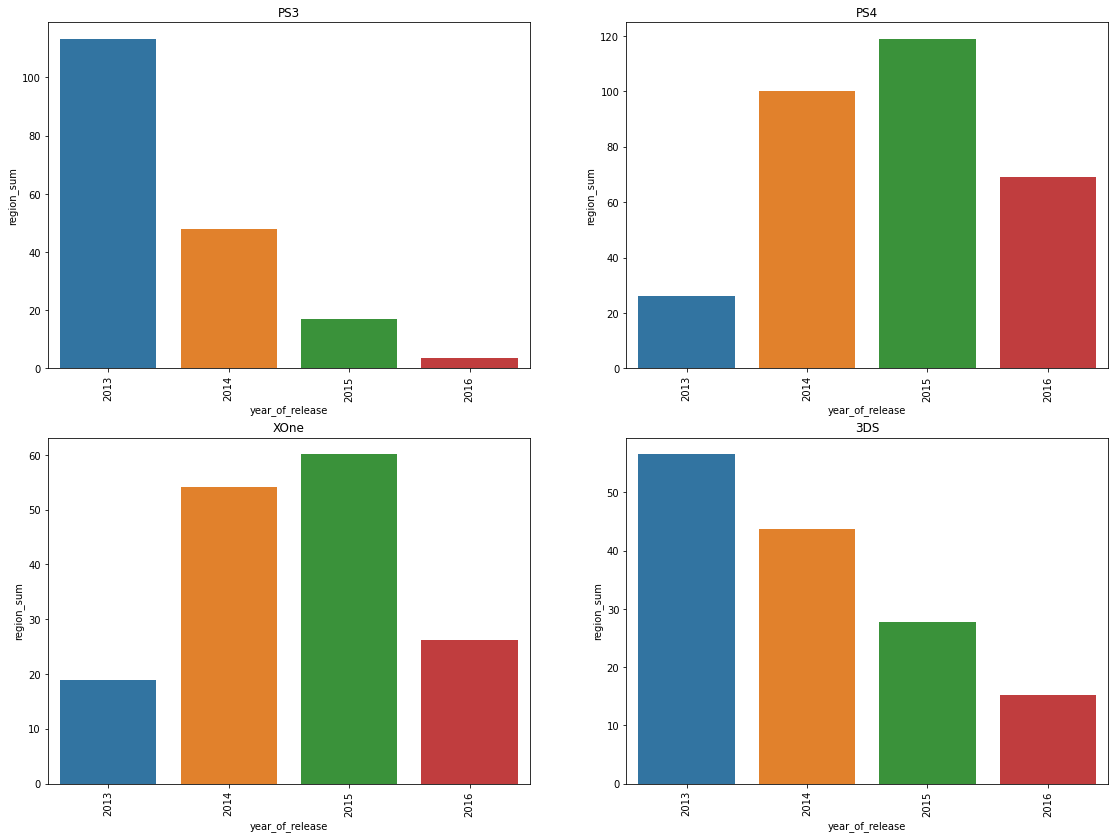

In [72]:
_, axs = plt.subplots(2, 2, figsize=(19,14))
axs = axs.ravel()
top2 = ['PS3', 'PS4', 'XOne', '3DS']

for i in range(len(top2)):
    ax = axs[i]
    sns.barplot(ax=ax, x="year_of_release", y="region_sum", data=top_platforms2.loc[top_platforms2['platform'] == top2[i]])
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(top2[i])

**Summary:** We suggest that PS4, XOne, 3DS are more profitable than other platforms since bothe the sum and the distribution of sales are higher that on other platforms.

Let's examine box plots for sales on different platforms.

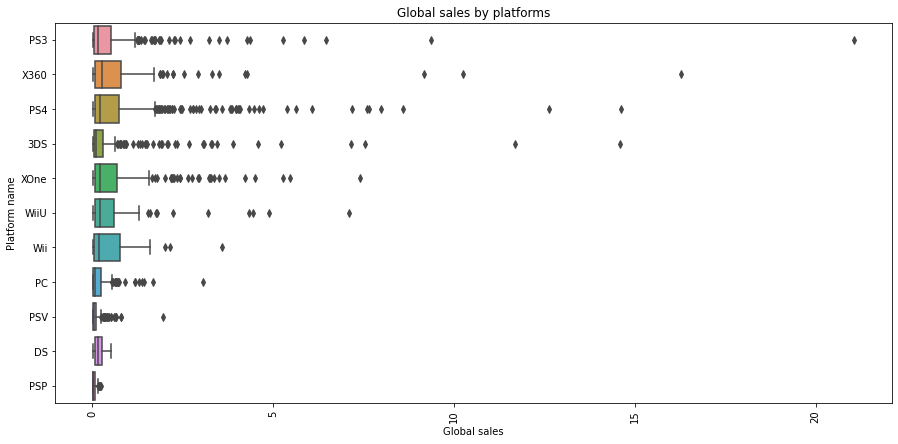

In [89]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['region_sum'], y=df['platform'])
plt.title('Global sales by platforms')
plt.xlabel('Global sales')
plt.xticks(rotation = 90)
plt.ylabel('Platform name')
plt.show()

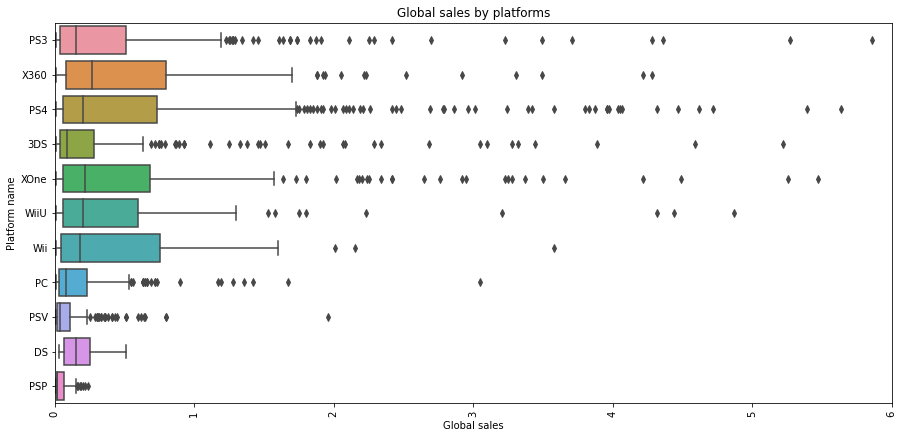

In [88]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['region_sum'], y=df['platform'])
plt.title('Global sales by platforms')
plt.xlabel('Global sales')
plt.xticks(rotation = 90)
plt.xlim(0,6)
plt.ylabel('Platform name')
plt.show()

**Summary:** The distribution of variables is right-skewed (that is why we see so many values outside the 3rd quartile).

Let's take a look at how PS4 game sales correlate with user and critic reviews.

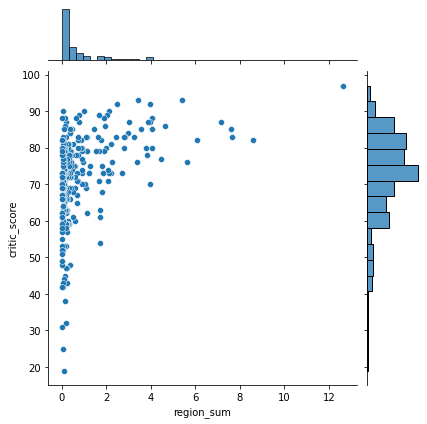

In [76]:
sns.jointplot(data=df.loc[(df['platform'] == 'PS4') & (df['critic_score'] > 0)], x='region_sum', y='critic_score')
plt.show()

In [77]:
print('Correlation between sales and critic score:', \
      df.loc[(df['platform'] == 'PS4') & (df['critic_score'] > 0), 'region_sum'].corr(df.loc[(df['platform'] == 'PS4') & (df['critic_score'] > 0), 'critic_score']))

Correlation between sales and critic score: 0.40656790206178145


The correlation between game sales and critic scores is positive. The strength of the correlation is weak (0.4).

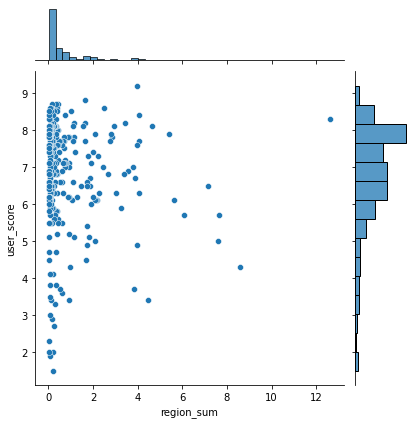

In [78]:
sns.jointplot(data=df.loc[(df['platform'] == 'PS4') & (df['user_score'] > 0)], x='region_sum', y="user_score")
plt.show()

In [79]:
print('Correlation between sales and user score:', \
      df.loc[(df['platform'] == 'PS4') & (df['user_score'] > 0), 'region_sum'].corr(df.loc[(df['platform'] == 'PS4') & (df['user_score'] > 0), 'user_score']))

Correlation between sales and user score: -0.031957110204556466


There is no correlation between game sales and user scores (correlation is -0.03).

Let's look at the correlation between sales and ratings on the XOne, 3DS, WiiU, PC and XB platforms. Let's compare the results with those obtained for the PS4 platform.

In [80]:
platforms_to_compare = df.query('(platform == "PS4") | (platform == "XOne") | (platform == "WiiU") | (platform == "3DS") | (platform == "PC") | (platform == "XB")')
display(platforms_to_compare.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [81]:
plat = platforms_to_compare['platform'].unique()
platforms_to_compare2 = platforms_to_compare.query('critic_score > 0').copy()

for i in plat:
    data = platforms_to_compare2.loc[platforms_to_compare2['platform'] == i]
    print(f'Correlation between sales on {i} and critic score:', \
          data.loc[data['platform'] == i, 'region_sum'].corr(data.loc[data['platform'] == i, 'critic_score']))

Correlation between sales on PS4 and critic score: 0.40656790206178145
Correlation between sales on 3DS and critic score: 0.3570566142288104
Correlation between sales on XOne and critic score: 0.4169983280084016
Correlation between sales on WiiU and critic score: 0.3764149065423912
Correlation between sales on PC and critic score: 0.1960302829436937


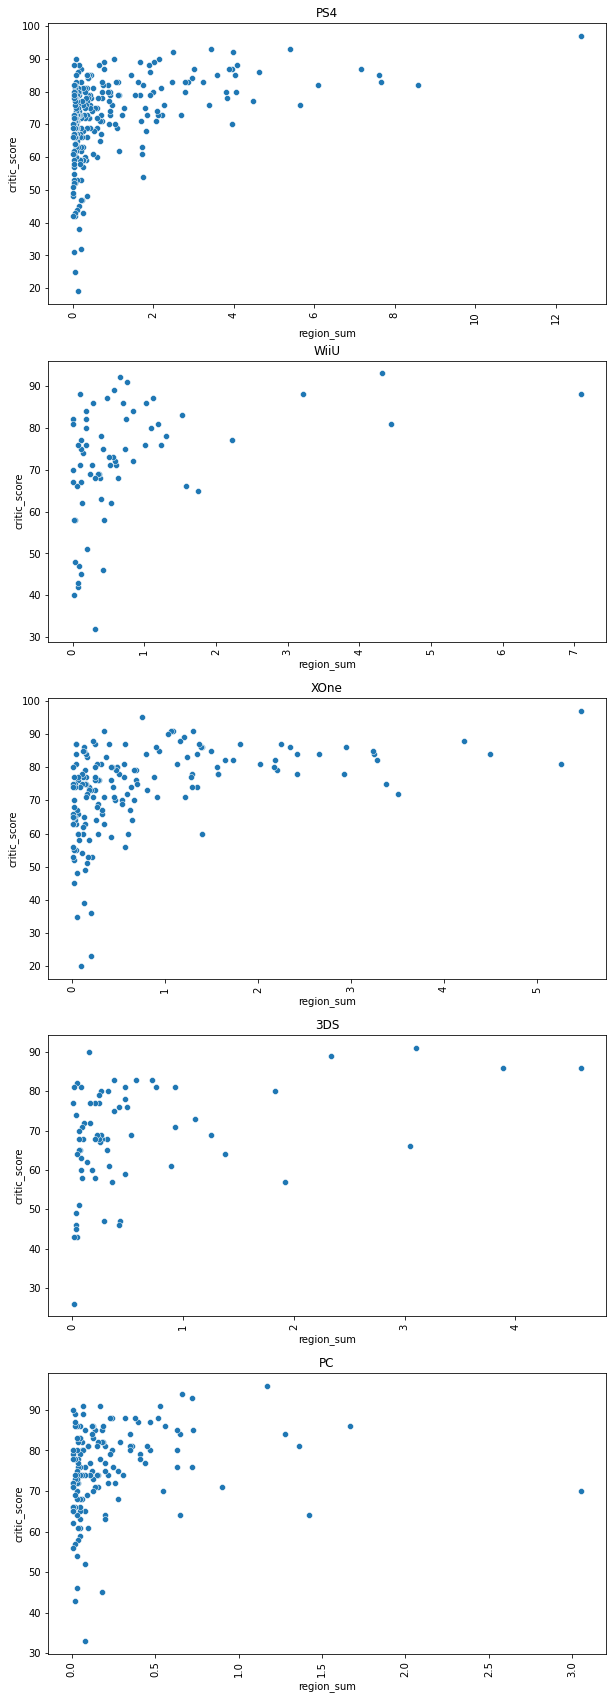

In [82]:
_, axs = plt.subplots(5, 1, figsize=(10,30))
axs = axs.ravel()
plat = platforms_to_compare2['platform'].unique()

for i in range(len(plat)):
    ax = axs[i]
    sns.scatterplot(ax=ax, data=platforms_to_compare2.loc[platforms_to_compare2['platform'] == plat[i]], x='region_sum', y="critic_score")
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(plat[i])

In [83]:
platforms_to_compare3 = platforms_to_compare.query('user_score > 0').copy()

for i in plat:
    data = platforms_to_compare3.loc[platforms_to_compare3['platform'] == i]
    print(f'Correlation between sales on {i} and user score:', \
          data.loc[data['platform'] == i, 'region_sum'].corr(data.loc[data['platform'] == i, 'user_score']))

Correlation between sales on PS4 and user score: -0.031957110204556466
Correlation between sales on WiiU and user score: 0.41933048192661837
Correlation between sales on XOne and user score: -0.06892505328279419
Correlation between sales on 3DS and user score: 0.24150411773563024
Correlation between sales on PC and user score: -0.09384186952476745


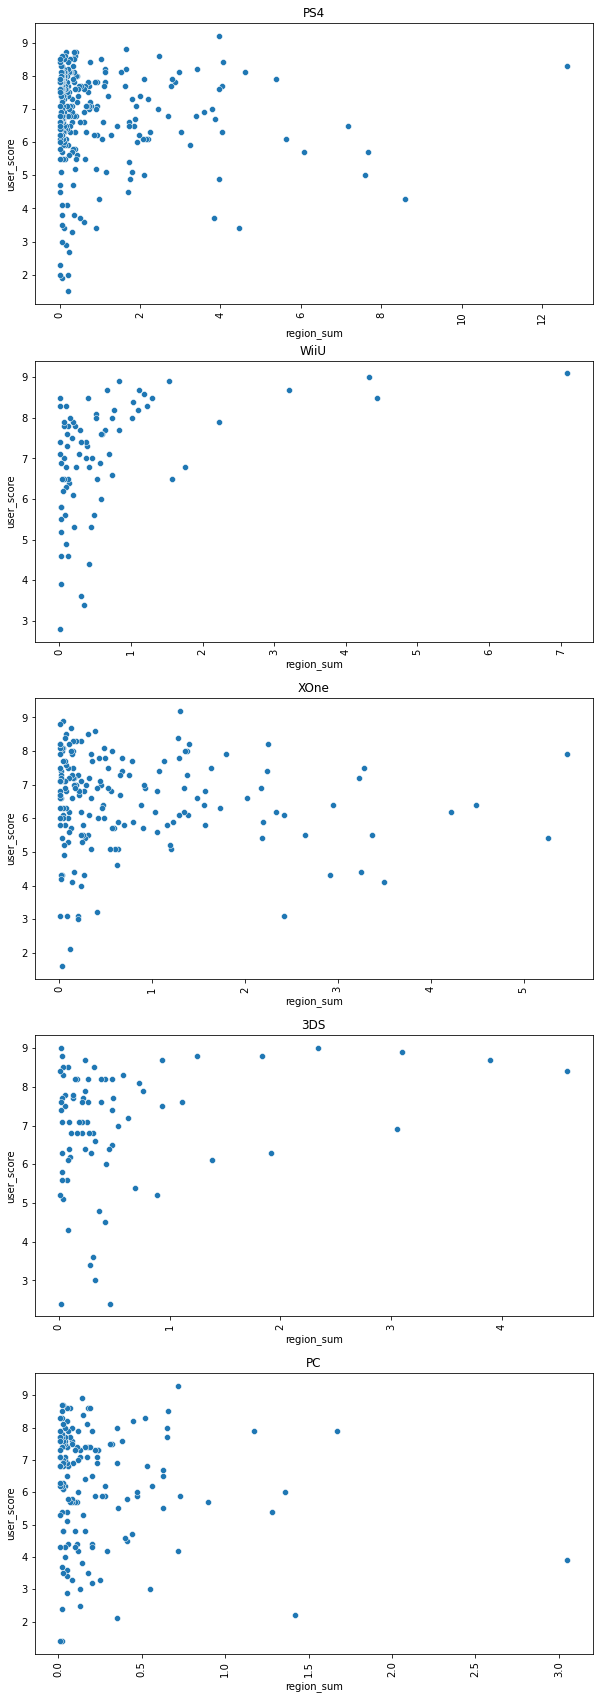

In [84]:
_, axs = plt.subplots(5, 1, figsize=(10,30))
axs = axs.ravel()
plat = platforms_to_compare3['platform'].unique()

for i in range(len(plat)):
    ax = axs[i]
    sns.scatterplot(ax=ax, data=platforms_to_compare3.loc[platforms_to_compare3['platform'] == plat[i]], x='region_sum', y="user_score")
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(plat[i])

**Summary:** The correlation between sales and critic score is positive: the higher critic score, the higher sales. In most cases, there is no correlation between user ratings and game sales. There are weak positive correlation between game sales on WiiU/3DS and user reviews. Thus, only critic score can be positively related to sales.

Let's study the distribution of games by genre.

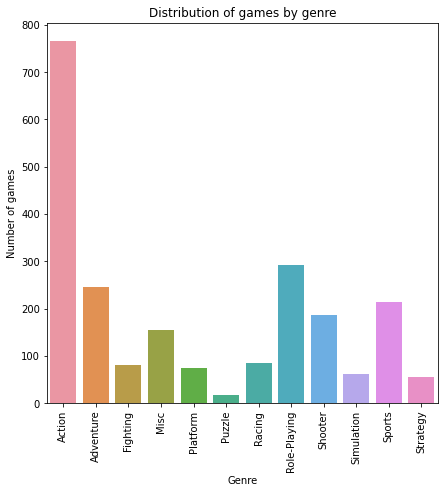

In [85]:
genre = (df
         .pivot_table(index='genre', values='name', aggfunc='count')
)

plt.figure(figsize=(7,7))
sns.barplot(x=genre.index, y=genre['name'])
plt.title('Distribution of games by genre')
plt.xlabel('Genre')
plt.xticks(rotation = 90)
plt.ylabel('Number of games')
plt.show()

Let's study the distribution of sales by genre.

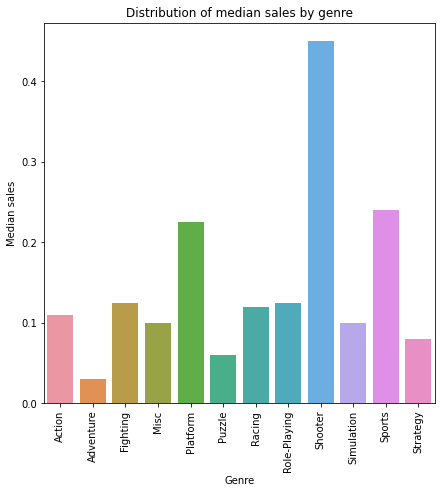

In [86]:
genre = (df
         .pivot_table(index='genre', values='region_sum', aggfunc='median')
)

plt.figure(figsize=(7,7))
sns.barplot(x=genre.index, y=genre['region_sum'])
plt.title('Distribution of median sales by genre')
plt.xlabel('Genre')
plt.xticks(rotation = 90)
plt.ylabel('Median sales')
plt.show()

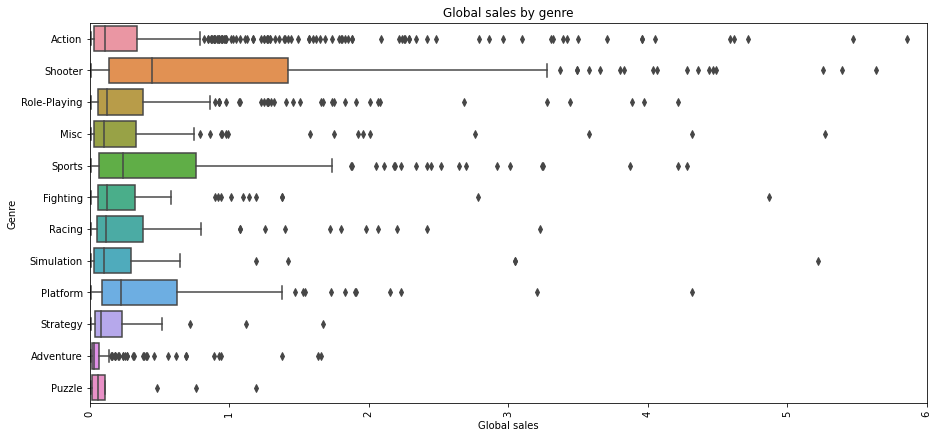

In [87]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['region_sum'], y=df['genre'])
plt.title('Global sales by genre')
plt.xlabel('Global sales')
plt.xticks(rotation = 90)
plt.xlim(0,6)
plt.ylabel('Genre')
plt.show()

**Summary:** A lot of action, role-playing and adventure games were released within last 4 years. There were less shooter and sports games. Least games were released in puzzle genre. The most profitable genres are shooter, sports, platform. Action, fighting and racing are less profitable. Adventure games have the lowest median sales.

## User portrait

Let's determine the most popular platforms (top 5) for users from NA, EU or JP. Firstly, we calculate the sum of game sales on each platform in three regions.

In [90]:
top_platforms = (df
                 .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)

display(top_platforms.head())

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74


To compare the most popular platforms by region, let's calculate the share of sales on each platform in each region.

In [91]:
top_platforms['eu_share'] = top_platforms['eu_sales']*100/sum(top_platforms['eu_sales'])
top_platforms['na_share'] = top_platforms['na_sales']*100/sum(top_platforms['na_sales'])
top_platforms['jp_share'] = top_platforms['jp_sales']*100/sum(top_platforms['jp_sales'])

Let's look at top-5 platforms in each region.

In [123]:
display(top_platforms.sort_values(by='eu_share', ascending=False).head()['eu_share'])

platform
PS4     35.971241
PS3     17.288326
XOne    13.152997
X360    10.840578
3DS      7.893328
Name: eu_share, dtype: float64

In [124]:
display(top_platforms.sort_values(by='jp_share', ascending=False).head()['jp_share'])

platform
3DS     48.167353
PS3     16.586163
PSV     13.205001
PS4     11.336838
WiiU     7.728371
Name: jp_share, dtype: float64

In [125]:
display(top_platforms.sort_values(by='na_share', ascending=False).head()['na_share'])

platform
PS4     24.842933
XOne    21.274360
X360    18.656188
PS3     14.507322
3DS      8.727239
Name: na_share, dtype: float64

**Summary:** The most popular platforms in Europe are PS4, PS3, XOne, X360 and 3DS; in Japan - 3DS, PS3, PSV, PS4 and WiiU; in North America - PS4, XOne, X360, PS3, 3DS. PS3 is in the top both in Europe (17.3% of sales), and in Japan (16.6%), and in America (14.5%). PS4 platforms are also popular in all regions (in Europe - 35.97%, in Japan - 11.3%, in America - 24.8%) as well as 3DS (in Europe - 7.89%, in Japan - 48.1%, in America - 8.7%). These platforms are also on the top in the ranking of platforms by global sales.

Let's determine the most popular genres (top 5) for the users from NA, EU or JP.

In [92]:
top_genres = (df
              .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)

display(top_genres.head())

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14


In [93]:
top_genres['eu_share'] = top_genres['eu_sales']*100/sum(top_genres['eu_sales'])
top_genres['na_share'] = top_genres['na_sales']*100/sum(top_genres['na_sales'])
top_genres['jp_share'] = top_genres['jp_sales']*100/sum(top_genres['jp_sales'])

In [94]:
display(top_genres.sort_values(by='eu_share', ascending=False).head()['eu_share'])

genre
Action          30.117533
Shooter         22.400122
Sports          15.429722
Role-Playing     9.425592
Racing           5.147490
Name: eu_share, dtype: float64

In [95]:
display(top_genres.sort_values(by='jp_share', ascending=False).head()['jp_share'])

genre
Role-Playing    36.255150
Action          28.761188
Misc             6.535019
Fighting         5.434011
Shooter          4.695269
Name: jp_share, dtype: float64

In [96]:
display(top_genres.sort_values(by='na_share', ascending=False).head()['na_share'])

genre
Action          28.797606
Shooter         25.071394
Sports          14.911700
Role-Playing    10.600626
Misc             6.280414
Name: na_share, dtype: float64

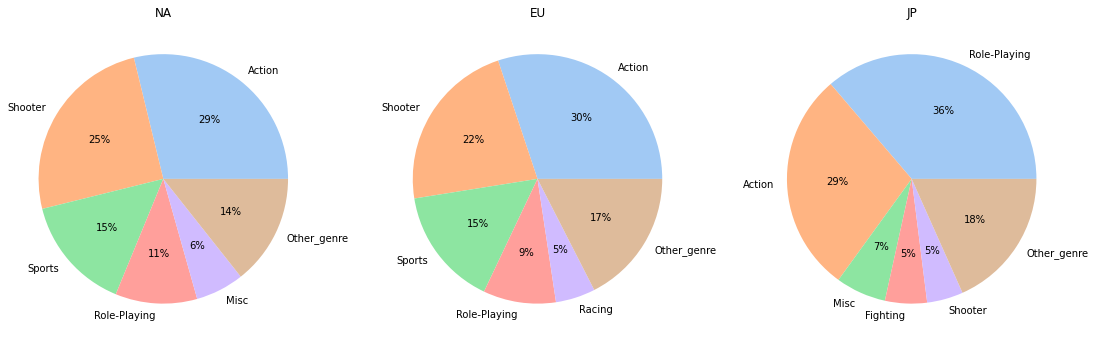

In [97]:
colors = sns.color_palette('pastel')[0:6]
countries = df.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(19,20))
axs = axs.ravel()

for i in range(len(countries)):
    ax = axs[i]
    df_i = (df.groupby('genre')[countries[i]].sum()
            .reset_index()
            .sort_values(countries[i], ascending = False, ignore_index = True)
            .head(5))
    df_i = df_i.append({'genre': 'Other_genre', countries[i]: df[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
    ax.pie(df_i[countries[i]], labels = df_i['genre'], colors = colors, autopct='%.0f%%')
    ax.set_title(df_i.columns[1].split('_')[0].upper())

**Summary:** The most popular genres in Europe are Action, Shooter, Sports, Role-Playing and Racing; in Japan - Role-Playing, Action, Music, Fighting and Shooter; in North America - Action, Shooter, Sports, Music and Role-Playing. Action, Shooter and Role-Playing genres are popular in all three regions.

Let's find out whether the ESRB rating affects sales in NA, EU or JP. Let's look at the correlation between the rating value and sales in Europe, Japan and North America. To calculate the correlation, let's replace the categorical values from the `rating` column with ordinal values.

In [98]:
def rating_to_num(series):
    if series == 'unknown':
        return 0
    elif series == 'RP':
        return 1
    elif series == 'EC':
        return 2
    elif series == 'E':
        return 3
    elif series == 'E10+':
        return 4
    elif series == 'T':
        return 5
    elif series == 'M':
        return 6

df['rating_num'] = df['rating'].apply(rating_to_num)
display(df[['rating', 'rating_num']].head(10))

,rating,rating_num
16,M,6
23,M,6
31,unknown,0
33,unknown,0
42,M,6
47,unknown,0
60,M,6
69,M,6
72,unknown,0
77,E,3


Now let's calculate the correlation and build graphs. We can see that in Japan there is no correlation between ESRB rating and sales (the correlation coefficient is very small and equal to -0.09). There are a lot of missing values for Japan in rating variable (i.e. it takes the value 'unknown') that caused low correlation.

In Europe and North America, there are weak positive correlation between sales and age rating (correlation coefficients of 0.17 and 0.19, respectively): sales grow with the increase in the age rating.

In [99]:
print('Correlation between ESRB rating and sales in EU:', df['rating_num'].corr(df['eu_sales']))
print('Correlation between ESRB rating and sales in JP:', df['rating_num'].corr(df['jp_sales']))
print('Correlation between ESRB rating and sales in NA:', df['rating_num'].corr(df['na_sales']))

Correlation between ESRB rating and sales in EU: 0.17349439418561485
Correlation between ESRB rating and sales in JP: -0.08510877945042583
Correlation between ESRB rating and sales in NA: 0.18702852926427438


Europe has the most sales for Adults and Everyone, with significantly fewer sales of games for teens and children.

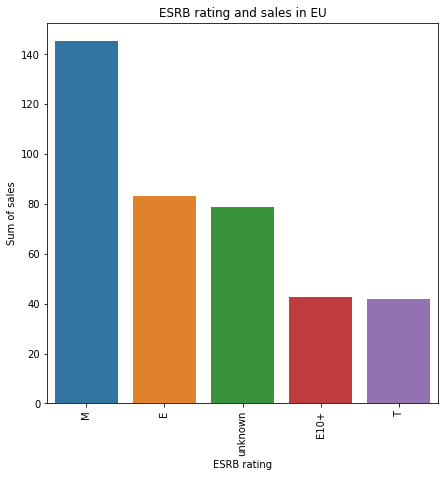

In [101]:
slaes_eu = (df
            .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
            .sort_values(by='eu_sales', ascending=False)
)

plt.figure(figsize=(7,7))
sns.barplot(x=slaes_eu.index, y=slaes_eu['eu_sales'])
plt.title('ESRB rating and sales in EU')
plt.xlabel('ESRB rating')
plt.xticks(rotation = 90)
plt.ylabel('Sum of sales')
plt.show()

Japan also has the most sales for Teen, Everyone, and Mature.

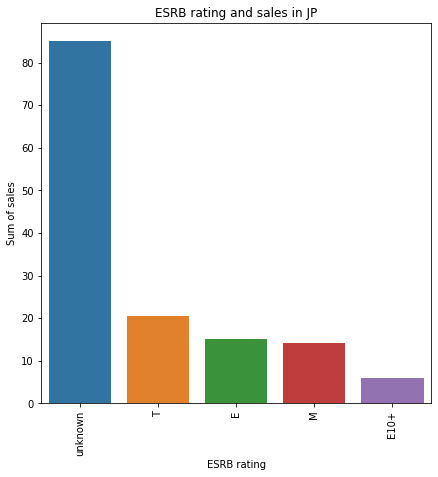

In [102]:
slaes_jp = (df
            .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
            .sort_values(by='jp_sales', ascending=False)
)

plt.figure(figsize=(7,7))
sns.barplot(x=slaes_jp.index, y=slaes_jp['jp_sales'])
plt.title('ESRB rating and sales in JP')
plt.xlabel('ESRB rating')
plt.xticks(rotation = 90)
plt.ylabel('Sum of sales')
plt.show()

There is similar situation in North America: games rated M(Mature), E(Everyone), and T(Teen) the most sold.

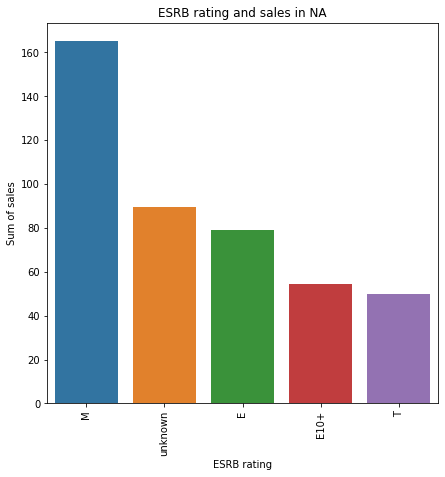

In [103]:
slaes_na = (df
            .pivot_table(index='rating', values='na_sales', aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
)

plt.figure(figsize=(7,7))
sns.barplot(x=slaes_na.index, y=slaes_na['na_sales'])
plt.title('ESRB rating and sales in NA')
plt.xlabel('ESRB rating')
plt.xticks(rotation = 90)
plt.ylabel('Sum of sales')
plt.show()

**Summary:** Thus, there is weak correlation between the rating and the number of sales. In all three regions, games rated Everyone(E), Mature(M), and Teen(T) have the highest sales.

## Hypothesis testing

To test hypotheses, it is necessary to filter out negative values.

In [106]:
df = df.query('user_score > 0').copy()

Let's test the hypothesis that the average user scores for the Xbox One and PC platforms are the same. To do this, we state the null and alternative hypotheses:

* H0: The average user scores for the Xbox One and PC platforms are the same (equal)

* H1: Average user scores for the Xbox One and PC platforms are different


Let's set the significance level at 0.05.

In [110]:
results = stats.ttest_ind(df.loc[df['platform'] == 'XOne', 'user_score'], df.loc[df['platform'] == 'PC', 'user_score'])

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis.')
else:
    print('Failed to reject null hypothesis.')

p-value:  0.14012658403611647
Failed to reject null hypothesis.


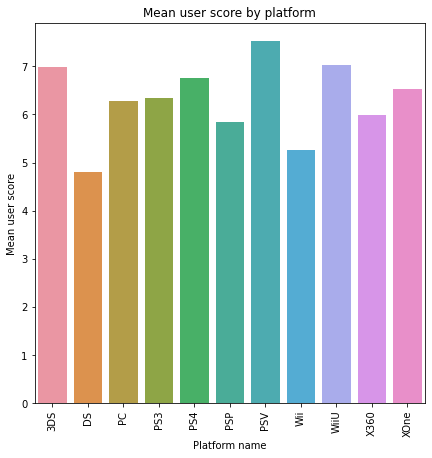

In [108]:
platform = (df
          .pivot_table(index='platform', values='user_score', aggfunc='mean')
)

plt.figure(figsize=(7,7))
sns.barplot(x=platform.index, y=platform['user_score'])
plt.title('Mean user score by platform')
plt.xlabel('Platform name')
plt.xticks(rotation = 90)
plt.ylabel('Mean user score')
plt.show()

**Summary:** We tested two-tailed hypothesis that the average user scores for Xbox One and PC platforms are the same, i.e. are equal (our H0). According to the test results, the p-value is 0.14, which means that the probability of observing the t-statistics that confirms H0 is high. We failed to reject the null hypothesis that the average user ratings of the Xbox One and PC platforms are the same, so we accept it.

Let's test the hypothesis that the average user scores of the Action and Sports genres are different:

* H0: Average user ratings for Action and Sports genres are the same (equal)

* H1: Average user ratings for Action and Sports are different

Let's set the significance level at 0.01.

In [111]:
results = stats.ttest_ind(df.loc[df['genre'] == 'Action', 'user_score'], df.loc[df['genre'] == 'Sports', 'user_score'])

alpha = 0.01

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis.')
else:
    print('Failed to reject null hypothesis.')

p-value:  1.0517832389140023e-27
Reject null hypothesis.


**Summary:** We used a two-tailed test to test the hypothesis and got a p-value < 0.01. Therefore, we can reject the null-hypothesis that the user scores for Action and Sports genres are equal – they are not.

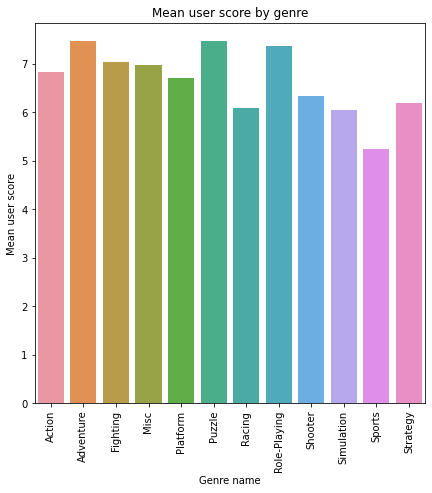

In [112]:
genres = (df
          .pivot_table(index='genre', values='user_score', aggfunc='mean')
)

plt.figure(figsize=(7,7))
sns.barplot(x=genres.index, y=genres['user_score'])
plt.title('Mean user score by genre')
plt.xlabel('Genre name')
plt.xticks(rotation = 90)
plt.ylabel('Mean user score')
plt.show()

## Conclusion

At the data preprocessing stage, all columns were renamed and data type of the "year of production" and "user rating" variables were changed. We also analysed data for duplicates, and filled in missing values in "name", "genre", "critics rating", "user rating", "ESRB rating" variables. We also checked for outliers in the data.

At the nest stage, we studied the number of releases of games in each year and global sales by platform. DS, PS-PS3, Wii and X360 were marked as the platforms with the highest sales . We also identified the period during which game platforms are popular - it is 9-10 years. Therefore, to make predictions for 2017 we decided to study data for the last 4 years from 2012 to 2016. Based on the distribution of sales we concluded that PS4, XOne and 3DS platforms are the most profitable. 

Next, correlation between critic score, user score and sales on each platforms was analyzed. A positive correlation was found between critic score and sales (for all three platforms). There is weak correlation between user score and sales. The correlation between genres and global sales was also examined. Most games are released in the genre of action, role-playing, advebture, sports. However among them only sports games are profitalbe. Fewer games are released in the shooter and platform genres, but these genres are also profitable (shooter games are the most profitable genre). The lowest sales are for adventure games.

Then, we studied users from Europe, North America and Japan. PS3, PS4 and 3DS platforms are popular in all regions. The most popular platform in Europe is PS4, in Japan - 3DS, in North America - PS4. Regarding genres, Action, Shooter, and Role-Playing genres are popular in all three regions. Finally, by region, games rated "Everyone" (E), "Mature" (M) and "Teen" (T) have the highest sales.

Finally, hypotheses 1) that the average user score of the Xbox One and PC platforms are the same and 2) that the average user score for the Action and Sports genres are different were tested. Firstly, the ratings of the Xbox One and PC platforms are the same. Secondly, user scores for the Action and Sports genres are different.

Thus, the sales depend on the platform, critic score, genre and ESRB rating.

**Summary:** PS4, XOne, and 3DS platforms are worth paying attention to as they are upgraded versions of platforms that have been popular over the past 10 years. Although sales on these platforms are slightly declining, they are on the top in different regions. In all three regions studied, the PS4 and 3DS platforms are popular.

Regarding the genres, it is worth focusing on shooter and sports games, which are more profitable than others. In addition, there are few games in this genre, so the competition should be small.

It is recommended to consider games rated "Everyone" (E) and "Mature" (M), as they are popular in all regions.

Choosing a platform and genre, it is possible to focus on critic score, since the correlation between sales and experts' rating is positive. It is not recommended to focus on user score - correlation with sales is very weak (and for some platforms there is no correlation at all).